# **Spotify playlist clustering**




Clustering - grouping of objects based on similarities between them.

In this work, the Spotify playlist will be clustered into two groups based on the mood of the song. For this, we will use a limited number of features which are could have impact on a song sounding positive or negative.




## **Data preparation**

The necessary files: songs_info.csv, audio_features.csv.

In [1]:
from google.colab import files 
uploaded = files.upload() 

Saving audio_features.csv to audio_features.csv
Saving clustering_functions.py to clustering_functions.py
Saving songs_info.csv to songs_info.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import clustering_functions as cl

In [4]:
# loading the data
df_features = pd.read_csv('audio_features.csv').iloc[:, 1:]
df_info = pd.read_csv('songs_info.csv').iloc[:, 1:]

**Spotipy audio features:**
*   acousticness - probability on a scale 0 to 1 whether the track is acoustic
*   danceability - describes how suitable the track is for dancing based on few parameters
*   duration_ms - duration of track in miliseconds
*   energy - measure of intensity and activity that give positive energy
*   instrumentalness - 0 - a lot of vocals, 1 - no vocals, track is instrumental
*   key - the key of the track using Pitch Class Notation (values 0-11, if no key detected - value of -1)
*   liveness - detects the presence of an audience in a recording (likelihood on a scale 0-1 whether the song was performed live)
*   loudness - loudness in decibels
*   mode - is the song major (1) or minor (0)
*   speechiness - presence of spoken words in a track (0 - no words, 1 song made entirely of words)
*   tempo - tempo in beats per minute
*   time_signature - how many beats are in each bar -  measure (3/4 or 7/4 measures)
*   valence - a measure from 0 to 1 describing musical possitiveness of a track

## **Analysis with the limited set of features**

In this analysis we will use only the following features:
*   energy
*   instrumentalness
*   loudness
*   valence
*   acousticness
*   danceability

In [6]:
# creating dataset with limited number of features
df2 = df_features.loc[:, ["energy","instrumentalness","loudness", "valence", "acousticness", "danceability"]]

In [7]:
df2.describe()

,energy,instrumentalness,loudness,valence,acousticness,danceability
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.640658,0.030059,-7.958334,0.451511,0.288443,0.603868
std,0.177581,0.119743,3.114011,0.214320,0.252545,0.160771
min,0.007560,0.000000,-28.353000,0.046100,0.000022,0.193000
25%,0.534500,0.000000,-9.179000,0.274500,0.062000,0.496500
50%,0.657000,0.000002,-7.284000,0.446000,0.231000,0.629000
75%,0.765000,0.000573,-6.148500,0.593000,0.454000,0.739500
max,0.988000,0.835000,-2.135000,0.931000,0.941000,0.919000


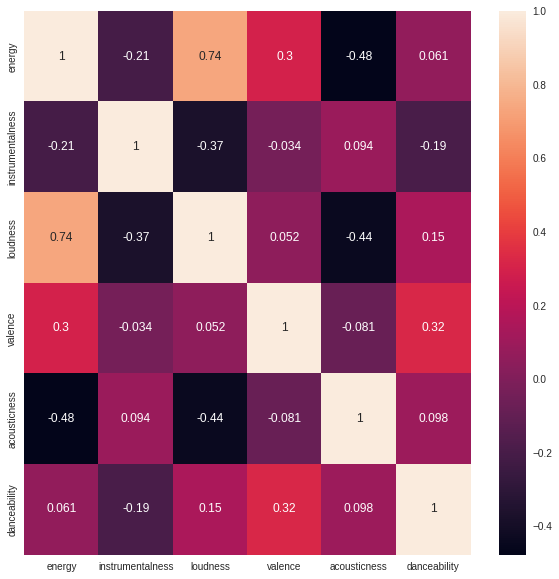

In [8]:
# Pearson correlation matrix
plt.figure(figsize=(10,10))
corr = df2.corr()
sns.heatmap(corr, annot = True)
plt.show()

From the Pearson corellation matrix: there is a visible positive correlation between energy and loudness. Also, instrumentalness and acousticness correlate negatively with loudness.
Therefore, loud songs are usually more energetic, and don't contain a lot of instrumental and acoustic fragments.

### **K-means clustering**

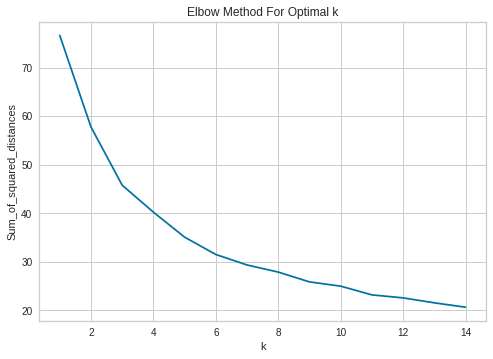

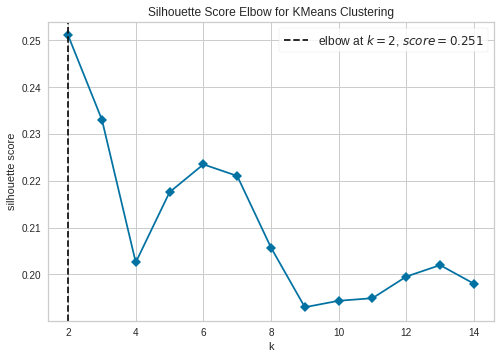

In [9]:
score,value,df2_scaled = cl.elbow_method(df2)

In [10]:
k=2
df_features,df_info=cl.kmeans_clustering(df2_scaled, k, df_features, df_info)

In [11]:
# save metadata of clusters
km2_0 = df_info[df_info['kmeans-2clusters']==0]
km2_1 = df_info[df_info['kmeans-2clusters']==1]

# save features of clusters
f2_0 = df_features[df_features['kmeans-2clusters']==0]
f2_1 = df_features[df_features['kmeans-2clusters']==1]

In [12]:
km2_0.head(20)

,name,album,artist,release_date,duration,popularity,id,kmeans-2clusters
1,Restart,Restart,Shellerini,2019-10-02,275294,35,2unYQbgst3vkYdAxH1rbEp,0
6,Drugi Brzeg,Drugi Brzeg,Paluch,2020-07-04,206582,40,3qXIUQwBPM6ZMgDQZxQAYX,0
10,Dym,Dym,Paluch,2017-06-26,229090,38,7EVqVTLvN1u5SQZlRGCkow,0
11,Imagine - Remastered 2010,Imagine,John Lennon,1971-09-09,187866,76,7pKfPomDEeI4TPT6EOYjn9,0
12,Toskania Outro,Europa,Taco Hemingway,2020-09-04,307840,47,2TYx5h3sQMNbDvX2ymvlDX,0
13,High Hopes - 2011 Remaster,The Division Bell (2011 Remastered Version),Pink Floyd,1994-03-28,511013,56,236mI0lz8JdQjlmijARSwY,0
15,Skrable,Art Brut 2,PRO8L3M,2020-03-07,243546,57,6KMvWbvvvD205ZhvXmjxVr,0
17,Flary,Ground Zero Mixtape,PRO8L3M,2018-03-16,211384,53,1jht5YeGQx0Rg8qgcEbUpz,0
18,On an Island,On an Island,David Gilmour,2006-03-07,407586,42,6WjWaFu6YADsMKqjmZE2g0,0
19,Brothers In Arms,Brothers In Arms,Dire Straits,1985-05-13,424000,3,0CzeAbfKFnxnWjwo5iYiCG,0


In [13]:
km2_1.head(20)

,name,album,artist,release_date,duration,popularity,id,kmeans-2clusters
0,Changes,Vol. 4 (2009 Remastered Version),Black Sabbath,1972-09-25,282493,56,4MpIwDaZdFLafMDcAx4k4q,1
2,Simple Man,Pronounced 'Leh-'Nérd 'Skin-'Nérd (Expanded Ed...,Lynyrd Skynyrd,1973,357933,59,6F6DxQ3XjToEHX1e2KKSbg,1
3,Can't Let You Go,Bent Out Of Shape,Rainbow,1983-01-01,259866,50,2L6LeWFHYhcxisYJ9X0Adn,1
4,Z Tobą,Wojtek Sokół,Sokół,2019-02-15,253533,0,0eZO12gIzIJ1HnV59OvYGT,1
5,Follow Your Heart,Follow Your Heart,Scorpions,2017-11-10,245626,55,1EJZQ6uhrvl4JtoKn7RKFd,1
7,Scene Eight: The Spirit Carries On,"Metropolis, Pt. 2: Scenes from a Memory",Dream Theater,1999-01-01,398266,54,7ycz6sgZWp4wvF53BZVTjE,1
8,Catch The Rainbow,Ritchie Blackmore's Rainbow,Rainbow,1975-01-01,396466,59,7FtRUrOEDUHTvenvp1BqZo,1
9,Wasted Years - 2015 Remaster,Somewhere in Time (2015 Remaster),Iron Maiden,1986,309640,67,1HM7Vp84E4SMzdrZONg6bH,1
14,Perfect Strangers,Perfect Strangers,Deep Purple,1984-09-16,328426,66,2JhJOPGvtqMpj5RQC8cIYf,1
16,Mówiłaś Mi…,Ja Tu Tylko Sprzątam,O.S.T.R.,2008-02-22,210306,45,3sHjkMe0OK4zI2nD85Oilh,1


In [14]:
# save data to csv
km2_0.to_csv('km2-cluster0.csv')
km2_1.to_csv('km2-cluster1.csv')

f2_0.to_csv('features2-cluster0.csv')
f2_1.to_csv('features2-cluster1.csv')

### **Analysis of the results**


##### **Features distribution**

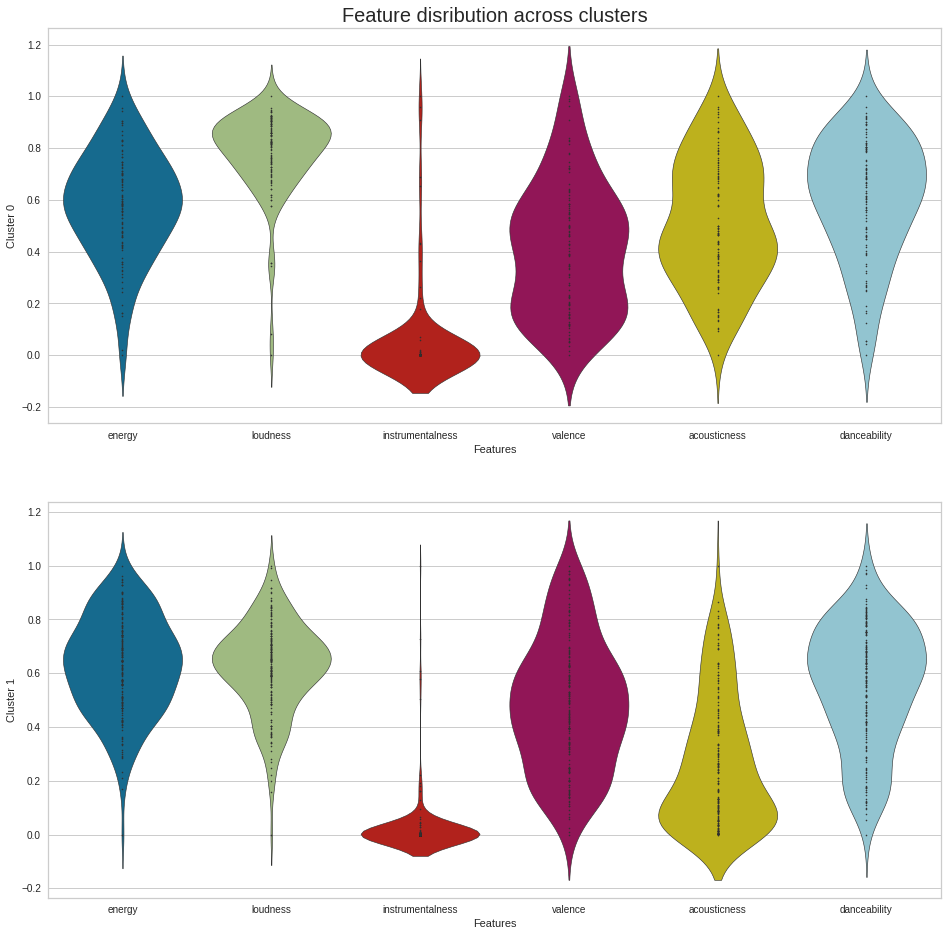

In [15]:
# feature distribution visualisation across 3 clusters
c0 = f2_0
c1 = f2_1

c0 = c0.loc[:,['energy', 'loudness', 'instrumentalness', "valence", "acousticness", "danceability"]]
c1 = c1.loc[:,['energy', 'loudness', 'instrumentalness', "valence", "acousticness", "danceability"]]

x = c0.values #returns a numpy array
min_max_scaler = MinMaxScaler()
c0_scaled = min_max_scaler.fit_transform(x)
c0 = pd.DataFrame(c0_scaled)
c0.columns = ['energy', 'loudness', 'instrumentalness', "valence", "acousticness", "danceability" ]
c0=c0.melt(var_name='Features', value_name='Cluster 0')

x = c1.values #returns a numpy array
min_max_scaler = MinMaxScaler()
c1_scaled = min_max_scaler.fit_transform(x)
c1 = pd.DataFrame(c1_scaled)
c1.columns = ['energy', 'loudness', 'instrumentalness', "valence", "acousticness", "danceability" ]
c1=c1.melt(var_name='Features', value_name='Cluster 1')


f, axes = plt.subplots(2, 1, figsize=(16,16))
ax = sns.violinplot( data=c0 ,x="Features", y="Cluster 0", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[0])
ax.set_title("Feature disribution across clusters", fontsize=20)
ax = sns.violinplot( data=c1 ,x="Features", y="Cluster 1", linewidth = 0.6, inner = 'point', scale= 'width', ax=axes[1])
plt.show()

Although the distribution of the features differs a bit in these two cluster, the differences are not very visible. This may indicate that the music taste of the user is quite consistent. Also, by analysing the content of the cluster, there is no rule of the division visible at once. However, in cluster 1 we can notice much more rock songs, while in cluster 0 there is a bigger amount of rap songs. 

##### **Visualisation of the clusters**
Let's see how the division of the clusters looks like on a 3d scatter plot.

In [16]:
fig1 = px.scatter_3d(df_features, x='acousticness', y='loudness', z='valence',
              color=df_features['kmeans-2clusters'],
              labels={"kmeans-2clusters": "Clusters"},
              title='Cluster division based on acousticness, loudness and valence',
              )
fig1.show()

As we can see, the clusters mix a bit, however, there are two groups visible in the plot. Both groups are located in the same area when it comes to loudness. As of valence - both clusters have elements that display low valence and high valence (there could be a division based on positivity). However, the difference can be observed on the acousticness dimension - cluster 0 has more acoustic songs than cluster 1.

Let's check another configuration of features.

In [17]:
fig1 = px.scatter_3d(df_features, x='energy', y='instrumentalness', z='danceability',
              color=df_features['kmeans-2clusters'],
              labels={"kmeans-2clusters": "Clusters"},
              title='Cluster division based on intrumentalness, energy and danceability',
              )
fig1.show()

In this visualisation we can see that the music in both clusters display instrumentalness close to zero (with few outliers). This can happen as most of the songs are rap songs. Also, most of the songs display rather high energy ( there is a slight difference between clusters - cluster 0 contains a bit less energetic songs. Finally, when it comes to danceability - both clusters have songs that are both good to dance to and not so much.

Given all these conclusions we can say that the features that impact the division of the clusters the most are: acousticness and energy. Let's check how these division looks like. We will combine this two features also with instrumentalness which is a neutral feature. 

In [18]:
fig1 = px.scatter_3d(df_features, x='energy', y='instrumentalness', z='acousticness',
              color=df_features['kmeans-2clusters'],
              labels={"kmeans-2clusters": "Clusters"},
              title='Cluster division based on energy, acousticness and intrumentalness',
              )
fig1.show()

This visualisation resulted in the most visible line between the two clusters on the acousticness - energy dimensions (while instrumentalness of both clusters has value close to 0).

## **Analysis based on loudness, valence, energy and danceability features**

Since the results of the previous clusterisation did not show big differences on the clusters in case of mood clustering (positive, negative) we will now focus only on the following features:
loudness, valence, energy and danceability

In [19]:
df3 = df_features.loc[:, ['loudness', 'valence', 'energy', 'danceability']]
df3.head()

,loudness,valence,energy,danceability
0,-12.244,0.187,0.238,0.289
1,-8.068,0.398,0.573,0.744
2,-9.379,0.423,0.734,0.461
3,-9.652,0.349,0.551,0.491
4,-8.218,0.558,0.666,0.769


### **K-means clustering**

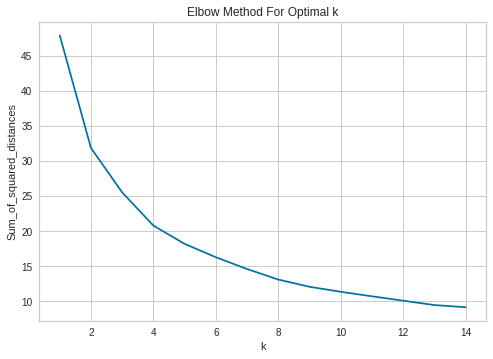

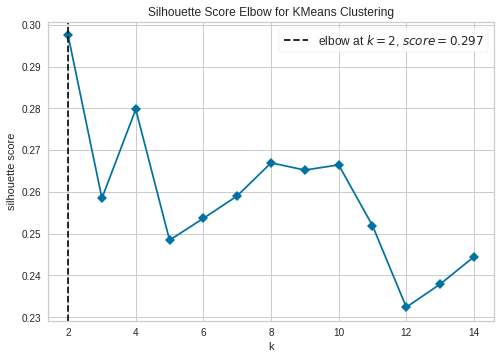

In [20]:
score, value, df3_scaled = cl.elbow_method(df3)

In [21]:
df_features, df_info = cl.kmeans_clustering(df3_scaled, k, df_features, df_info)

In [22]:
df_info.head()

,name,album,artist,release_date,duration,popularity,id,kmeans-2clusters
0,Changes,Vol. 4 (2009 Remastered Version),Black Sabbath,1972-09-25,282493,56,4MpIwDaZdFLafMDcAx4k4q,0
1,Restart,Restart,Shellerini,2019-10-02,275294,35,2unYQbgst3vkYdAxH1rbEp,1
2,Simple Man,Pronounced 'Leh-'Nérd 'Skin-'Nérd (Expanded Ed...,Lynyrd Skynyrd,1973,357933,59,6F6DxQ3XjToEHX1e2KKSbg,0
3,Can't Let You Go,Bent Out Of Shape,Rainbow,1983-01-01,259866,50,2L6LeWFHYhcxisYJ9X0Adn,0
4,Z Tobą,Wojtek Sokół,Sokół,2019-02-15,253533,0,0eZO12gIzIJ1HnV59OvYGT,1


In [23]:
# save metadata of clusters
km3_0 = df_info[df_info['kmeans-2clusters']==0]
km3_1 = df_info[df_info['kmeans-2clusters']==1]

# save features of clusters
f3_0 = df_features[df_features['kmeans-2clusters']==0]
f3_1 = df_features[df_features['kmeans-2clusters']==1]

In [24]:
# save data to csv
km3_0.to_csv('km3-cluster0.csv')
km3_1.to_csv('km3-cluster1.csv')

f3_0.to_csv('features3-cluster0.csv')
f3_1.to_csv('features3-cluster1.csv')

### **Analysis of the results**

In [25]:
fig1 = px.scatter_3d(df_features, x='energy', y='danceability', z='valence',
              color=df_features['kmeans-2clusters'],
              labels={"kmeans-2clusters": "Clusters"},
              title='Cluster division based on energy, danceability and valence',
              )
fig1.show()

This visualisation finally displays two clusters that have different separate shapes. The division is quite clear on the valence axis - the playlist has been successfully divided into more positive and more negative songs.
Both clusters contain songs with high and low values of danceability and energy.

## **Summary**
The user's playlist have been clustered into 2 groups. Although the idea of this analysis was to divide the songs into groups based on their moods (positive, negative) the first analysis resulted in division of clusters based mostly on acousticness and energy - differentiation between rap and rock.

Then, the set of features included in the analysis was limited to valence, loudness, energy and danceability - to focus more on characteristics connected to mood analysis. This resulted in a clear boundary between two clusters indicating the group of positive songs and negative songs. 